# Decision Trees

In [1]:
#importing libraries and data set
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
df=pd.read_excel(r'/Users/adithkumar/Desktop/DS/Assignment/Decision Tree/heart_disease.xlsx',sheet_name=1)
df.shape

(908, 13)

In [2]:
df.head

<bound method NDFrame.head of      age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               th

# Exploratory Data Analysis (EDA)

In [4]:
# Check for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [5]:
# Check for outliers
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


# 2.Data visuvalization

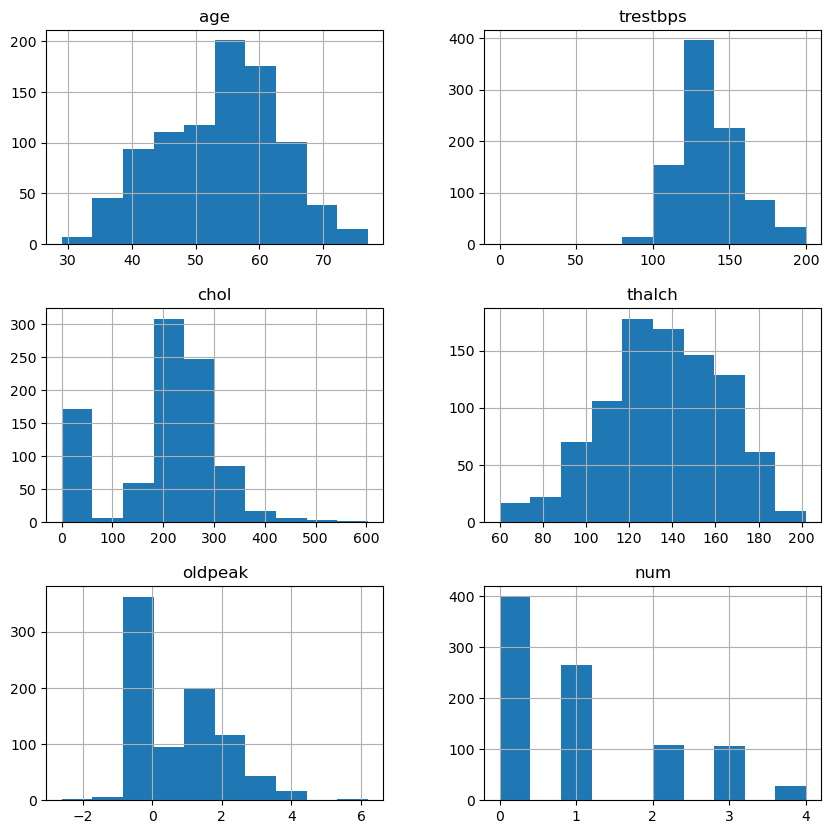

In [6]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10), bins=10)
plt.show()

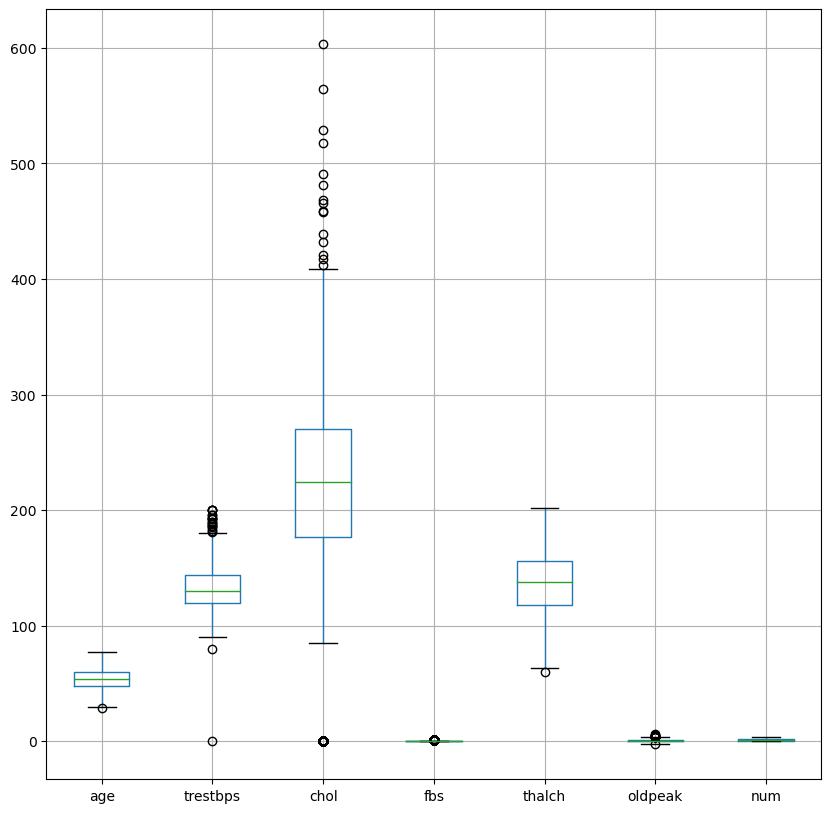

In [7]:
#box plot
df.boxplot(figsize=(10, 10))
plt.show()

# correlation matrices

In [8]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Correlation matrix for numerical variables
num_corr = df[num_cols].corr()

# Display the correlation matrix
print("Correlation matrix for numerical variables:")
display(num_corr)

Correlation matrix for numerical variables:


,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.029898,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,-0.323058,0.437577,1.000000


# 3. Feature Engineering:

In [9]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Handling missing values
df.fillna(df.mean(), inplace=True)

In [10]:
# Check for missing values
df.isnull().sum()

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

# 4. Decision Tree Classification:
Converting the target variable to a classification variable

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
df = pd.get_dummies(df, drop_first=True)
df.isnull().sum()

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

In [12]:
# Split the dataset into training and testing 
df['num'] = (df['num'] > 0).astype(int)
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a Decision Tree Classification model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
# Create an imputer object
imputer = SimpleImputer(strategy='mean')
# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

In [13]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7472527472527473
Precision: 0.7398925240129183
Recall: 0.7472527472527473
F1 Score: 0.7431932297249345
ROC-AUC: 0.6455798864557988


# 5. Hyperparameter Tuning:

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['entropy', 'gini']
}

# Create a DecisionTreeClassifier instance
dt_clf = DecisionTreeClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf, param_grid=grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Accuracy: 0.7197802197802198
Precision: 0.6968871748283514
Recall: 0.7197802197802198
F1 Score: 0.7056789978841945
ROC-AUC: 0.5825628548256285


# 6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained. Visualize the decision tree structure to understand the rules learned by the model and identify important features

[[117  20]
 [ 31  14]]


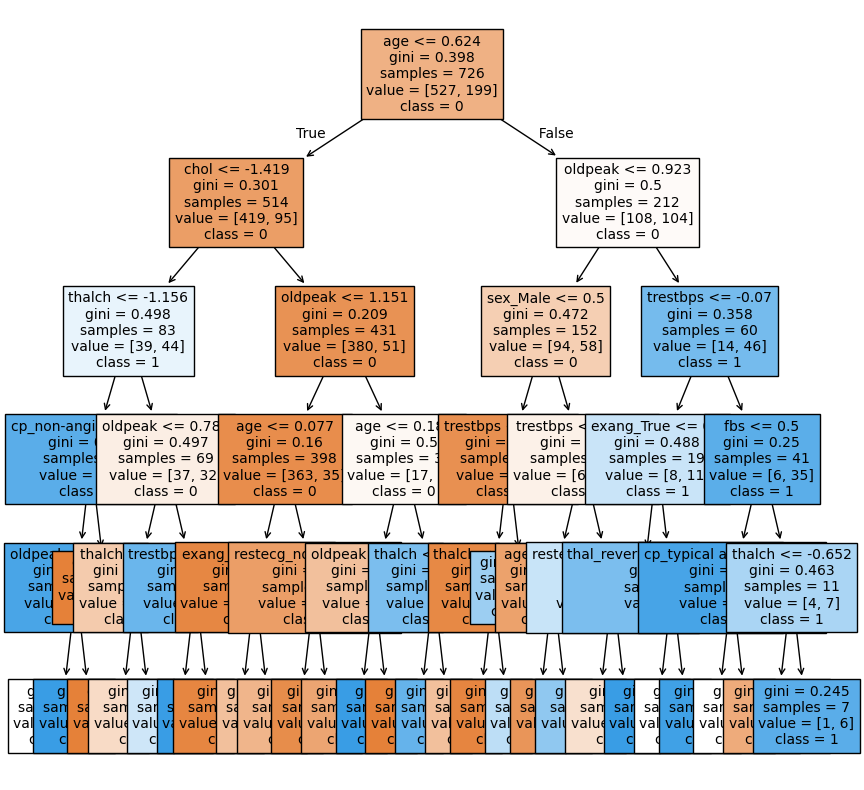

age: 0.271300542536541
trestbps: 0.09141206549562447
chol: 0.17860318004271025
fbs: 0.01074230711916792
thalch: 0.06850709984871847
oldpeak: 0.23193050323713607
sex_Male: 0.05534937590584516
cp_atypical angina: 0.0
cp_non-anginal: 0.011973863801264853
cp_typical angina: 0.0060894858267080765
restecg_normal: 0.04067271963448049
restecg_st-t abnormality: 0.0
exang_True: 0.014422466431677005
exang_FALSE: 0.0076461650585107335
exang_TURE: 0.0
slope_flat: 0.0
slope_upsloping: 0.0
thal_normal: 0.0
thal_reversable defect: 0.011350225061615633


In [15]:
import matplotlib.pyplot as plt
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['0', '1'], fontsize=10, filled=True)
plt.show()

# Feature importance
importance = best_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

In [16]:
# Evaluate the model performance using the obtained metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7197802197802198
Precision: 0.6968871748283514
Recall: 0.7197802197802198
F1 Score: 0.7056789978841945
ROC-AUC: 0.5825628548256285


# Interview Question

### 1. Common Hyperparameters of Decision Tree Models and Their Effects on Performance

Decision tree models have several hyperparameters that significantly influence their performance:

- **Max Depth**: This parameter limits the depth of the tree. A deeper tree can model more complex patterns but is prone to overfitting. A shallower tree is simpler and might underfit the data.
- **Min Samples Split**: This defines the minimum number of samples required to split an internal node. Higher values prevent the model from creating nodes that capture noise, thus reducing overfitting.
- **Min Samples Leaf**: This specifies the minimum number of samples required to be at a leaf node. Similar to min samples split, it helps in preventing overfitting by ensuring that leaf nodes have enough data points.
- **Max Features**: This parameter determines the number of features to consider when looking for the best split. Limiting the number of features can reduce overfitting and improve the model's generalization.
- **Criterion**: This determines the function to measure the quality of a split (e.g., Gini impurity or information gain). Different criteria can lead to different splits and thus impact the model's performance.

Adjusting these hyperparameters helps balance the trade-off between bias and variance, enabling the model to generalize better to unseen data.

### 2. Difference Between Label Encoding and One-hot Encoding

Label encoding and one-hot encoding are two methods to convert categorical data into numerical format for machine learning models:

- **Label Encoding**: This method assigns a unique integer to each category. For instance, if a feature has categories `red`, `green`, and `blue`, label encoding might assign `0` to `red`, `1` to `green`, and `2` to `blue`. Label encoding is simple and memory-efficient but can create misleading ordinal relationships where none exist, potentially affecting the model's performance.

- **One-hot Encoding**: This method creates binary columns for each category. Using the same example, `red`, `green`, and `blue` would be converted into three binary features: `[1, 0, 0]` for `red`, `[0, 1, 0]` for `green`, and `[0, 0, 1]` for `blue`. One-hot encoding avoids the ordinal issue by treating categories independently. However, it can increase the dimensionality of the data significantly, especially with features that have many categories, which can impact computational efficiency.

Each method has its use cases, with one-hot encoding generally preferred for nominal data and label encoding suitable for ordinal data.